In [1]:
import sys
sys.path.append('../')
import networkx as nx
import time
from smodels.theory.exceptions import SModelSTheoryError as SModelSError
from smodels.tools.smodelsLogging import logger
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.crossSection import XSection,XSectionInfo,XSectionList
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
from smodels.theory.decomposer import decompose
from smodels.tools.smodelsLogging import logger
# logger.setLevel('DEBUG')
import itertools
%load_ext line_profiler

### Load model

In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
# slhafile = '../inputFiles/slha/simplyGluino.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


### Check with large sigmacut

In [3]:
sigmacut = 3.9*fb
t0 = time.time()
topDict = decompose(model, sigmacut= sigmacut, massCompress=False, invisibleCompress=False)
print("decomposer done in %.2f s." % (time.time() -t0 ) )
# nUnique = 103 # uncompressed
print('%i unique elements' %(len(topDict.getSMSList())))
# print('%i unique elements (expected)' %nUnique)

decomposer done in 0.31 s.
269 unique elements


In [9]:
smsList = sorted(topDict.getSMSList(), key = lambda sms : sms.maxWeight,reverse=True)    
for sms in smsList:
    print(str(sms.treeToBrackets()[0]).replace("'","").replace(" ",""),'%1.3f' %sms.maxWeight)

[[[q,q]],[[q,c]]] 493.910
[[[q,q]],[[q,q]]] 468.157
[[[q,c]],[[q,q]]] 468.157
[[[q,c]],[[q,q]]] 264.700
[[[q,q]],[[q,q]]] 246.955
[[[q,c]],[[q,c]]] 246.955
[[[q,q]],[[q,q]]] 191.023
[[[q,q]],[[b,b]]] 162.110
[[[q,c]],[[b,b]]] 162.110
[[[b,b]],[[b,b],[q,q]]] 154.284
[[[nu,e+]],[[q,q]]] 146.393
[[[nu,mu+]],[[q,q]]] 146.393
[[[nu,ta+]],[[q,q]]] 146.007
[[[q,q]],[[c,c]]] 130.308
[[[q,c]],[[c,c]]] 130.308
[[[b,b],[q,q]],[[b,b],[q,q]]] 126.107
[[[t-,b],[q,q]],[[b,b],[q,q]]] 98.202
[[[t-,b],[q,c]],[[b,b],[q,q]]] 98.202
[[[b,b],[q,q]],[[b,t+],[q,q]]] 98.202
[[[b,b],[q,q]],[[b,t+],[q,c]]] 98.202
[[[q,q]],[[b,b]]] 91.659
[[[q,c]],[[b,b]]] 91.659
[[[b,b],[q,q]],[[b,b],[b,b]]] 87.335
[[[e-,nu]],[[q,q]]] 82.772
[[[mu-,nu]],[[q,q]]] 82.772
[[[ta-,nu]],[[q,q]]] 82.553
[[[q,q]],[[nu,nu]]] 77.444
[[[q,c]],[[nu,nu]]] 77.444
[[[mu-,nu]],[[q,c]]] 77.223
[[[e-,nu]],[[q,q]]] 77.223
[[[e-,nu]],[[q,c]]] 77.223
[[[mu-,nu]],[[q,q]]] 77.223
[[[nu,e+]],[[q,q]]] 77.223
[[[nu,e+]],[[q,c]]] 77.223
[[[nu,mu+]],[[q,q]

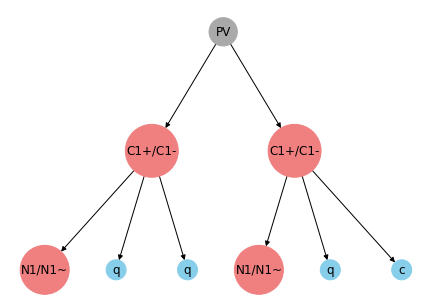

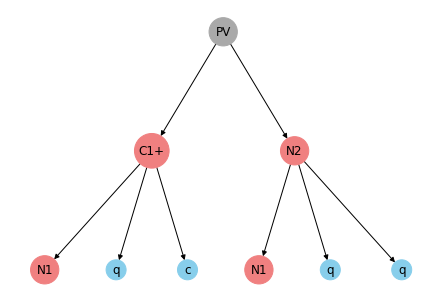

In [11]:
smsA = smsList[0]
smsB = smsList[2]
smsA.draw()
smsB.draw()

In [16]:
for nodeIndex in smsA.nodeIndices:
    if nodeIndex == 0: continue
    print(smsA.indexToNode(nodeIndex),smsB.indexToNode(nodeIndex))
    print(smsA.indexToNode(nodeIndex).mass,smsB.indexToNode(nodeIndex).mass)
    print(smsA.indexToNode(nodeIndex).compareTo(smsB.indexToNode(nodeIndex)))

C1+/C1- C1+
1.34E+02 [GeV] 1.34E+02 [GeV]
0
C1+/C1- N2
1.34E+02 [GeV] 1.35E+02 [GeV]
-1
N1/N1~ N1
6.81E+01 [GeV] 6.81E+01 [GeV]
0
q q
0.00E+00 [MeV] 0.00E+00 [MeV]
0
q c
0.00E+00 [MeV] 1.28E+00 [GeV]
-1
N1/N1~ N1
6.81E+01 [GeV] 6.81E+01 [GeV]
0
q q
0.00E+00 [MeV] 0.00E+00 [MeV]
0
c q
1.28E+00 [GeV] 0.00E+00 [MeV]
1
